# Data Analysis Practice

----

## 公司员工满意度数据分析

在当下的职场中，雇主在追求商业成功的同时也更重视员工对公司的满意度。员工对公司的评价可以很好地反应这一信息。另外，正在求职的人也可以通过员工对公司的评价提前了解关于公司更多真实的信息。

该项目根据求职网站[Glassdoor](https://www.glassdoor.com.au/index.htm)的员工匿名评论数据，分析科技公司的员工满意度。项目充分体现数据分析的各项环节：明确目的、数据获取、数据解析、数据分析及结果呈现。

Glassdoor是美国的一家做企业点评与职位搜索的职场社区。在Glassdoor上可匿名点评公司，包括其工资待遇，职场环境，面试问题等信息。

----

## 项目内容

### 1. 数据加载及概览

In [1]:
import pandas as pd

In [2]:
# Load data
df = pd.read_csv('./data/employee_reviews.csv')

In [3]:
# View data
df.head()

,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5,4,5,5,4,5,0,https://www.glassdoor.com/Reviews/Google-Revie...
1,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4,2,3,3,5,3,2094,https://www.glassdoor.com/Reviews/Google-Revie...
2,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5,5,4,5,5,4,949,https://www.glassdoor.com/Reviews/Google-Revie...
3,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5,2,5,5,4,5,498,https://www.glassdoor.com/Reviews/Google-Revie...
4,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5,5,5,5,5,5,49,https://www.glassdoor.com/Reviews/Google-Revie...


In [4]:
# Check the count of rows and columns
df.shape

(67529, 16)

In [5]:
# Check the statistical info
df.describe()

,overall-ratings,helpful-count
count,67529.000000,67529.000000
mean,3.826075,1.268211
std,1.154989,16.085852
min,1.000000,0.000000
25%,3.000000,0.000000
50%,4.000000,0.000000
75%,5.000000,1.000000
max,5.000000,2094.000000


In [6]:
# Check the basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67529 entries, 0 to 67528
Data columns (total 16 columns):
company                       67529 non-null object
location                      67529 non-null object
dates                         67529 non-null object
job-title                     67529 non-null object
summary                       67409 non-null object
pros                          67529 non-null object
cons                          67529 non-null object
advice-to-mgmt                67232 non-null object
overall-ratings               67529 non-null int64
work-balance-stars            67529 non-null object
culture-values-stars          67529 non-null object
carrer-opportunities-stars    67529 non-null object
comp-benefit-stars            67529 non-null object
senior-mangemnet-stars        67529 non-null object
helpful-count                 67529 non-null int64
link                          67529 non-null object
dtypes: int64(2), object(14)
memory usage: 8.2+ MB


该数据集包含67k条员工对科技公司的评论数据，包括Google, Amazon, Facebook, Apple, Microsoft和Netflix。

每条记录包含16列信息：

1. company: 公司
2. location: 评论者所在地
3. dates：评论日期
4. job-title: 员工职位
5. summary: 评论
6. pros: 公司优点
7. cons: 公司缺点
8. advice-to-mgmt: 建议
9. overall-ratings: 总体评分
10. work-balance-stars: 工作平衡评分
11. culture-values-stars: 公司文化价值评分
12. carrer-opportunities-stars: 职业发展机会评分
13. comp-benefit-stars：公司福利评分
14. senior-mangemnet-stars: 对高管的评分
15. helpful-count: 被认为该条评论有用的个数
16. link: 评论的链接

通过查看数据集的基本信息发现有些列的数据类型不符合要求，比如 work-balance-stars, culture-values-stars等。因为这些列中存在非数值类型的数据。

### 2. 数据处理

In [7]:
# 声明数值类型列
numeric_cols = ['overall-ratings', 'work-balance-stars', 'culture-values-stars', 
                'carrer-opportunities-stars', 'comp-benefit-stars', 'senior-mangemnet-stars', 'helpful-count']

# 声明字符串类型列
str_cols = ['company', 'location', 'dates', 'job-title', 'summary', 
            'pros', 'cons', 'advice-to-mgmt', 'link']

#### 数据类型处理

In [8]:
# 将列类型转换为数值类型
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors = 'coerce')

**errors = 'coerce' 强制将非数值类型的数据转换成了空值。**

转换类型后，非数值型的数据被转换成了NaN值，即空值。

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67529 entries, 0 to 67528
Data columns (total 16 columns):
company                       67529 non-null object
location                      67529 non-null object
dates                         67529 non-null object
job-title                     67529 non-null object
summary                       67409 non-null object
pros                          67529 non-null object
cons                          67529 non-null object
advice-to-mgmt                67232 non-null object
overall-ratings               67529 non-null int64
work-balance-stars            60369 non-null float64
culture-values-stars          53983 non-null float64
carrer-opportunities-stars    60421 non-null float64
comp-benefit-stars            60368 non-null float64
senior-mangemnet-stars        59754 non-null float64
helpful-count                 67529 non-null int64
link                          67529 non-null object
dtypes: float64(5), int64(2), object(9)
memory usage: 8.

In [10]:
df.head()

,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5,4.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
1,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4,2.0,3.0,3.0,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...
2,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5,5.0,4.0,5.0,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...
3,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5,2.0,5.0,5.0,4.0,5.0,498,https://www.glassdoor.com/Reviews/Google-Revie...
4,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5,5.0,5.0,5.0,5.0,5.0,49,https://www.glassdoor.com/Reviews/Google-Revie...


In [11]:
# 将空值填充为0
df[numeric_cols] = df[numeric_cols].fillna(0)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67529 entries, 0 to 67528
Data columns (total 16 columns):
company                       67529 non-null object
location                      67529 non-null object
dates                         67529 non-null object
job-title                     67529 non-null object
summary                       67409 non-null object
pros                          67529 non-null object
cons                          67529 non-null object
advice-to-mgmt                67232 non-null object
overall-ratings               67529 non-null int64
work-balance-stars            67529 non-null float64
culture-values-stars          67529 non-null float64
carrer-opportunities-stars    67529 non-null float64
comp-benefit-stars            67529 non-null float64
senior-mangemnet-stars        67529 non-null float64
helpful-count                 67529 non-null int64
link                          67529 non-null object
dtypes: float64(5), int64(2), object(9)
memory usage: 8.

查看各公司评论数量

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

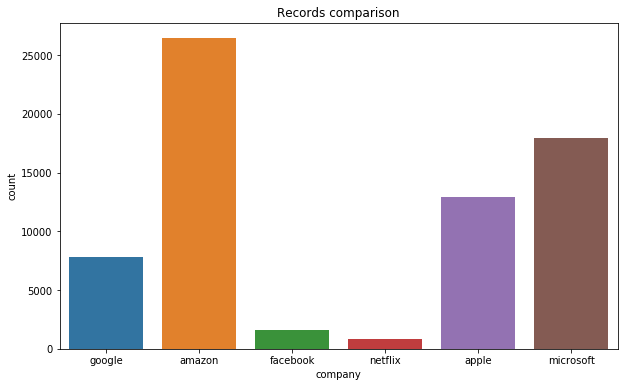

In [14]:
plt.figure(figsize =(10, 6))
sns.countplot(x='company', data=df)
plt.title('Records comparison')
plt.show()

#### 添加“员工状态”列，表示“在职员工”和“前员工”

In [15]:
df['employee_status'] = ''
df.loc[df['job-title'].str.contains('Current'), 'employee_status'] = 'Current'
df.loc[df['job-title'].str.contains('Former'), 'employee_status'] = 'Former'
df.head()

,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link,employee_status
0,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5,4.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...,Current
1,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4,2.0,3.0,3.0,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...,Former
2,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5,5.0,4.0,5.0,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...,Current
3,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5,2.0,5.0,5.0,4.0,5.0,498,https://www.glassdoor.com/Reviews/Google-Revie...,Current
4,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5,5.0,5.0,5.0,5.0,5.0,49,https://www.glassdoor.com/Reviews/Google-Revie...,Former


在职员工和前员工评论数对比

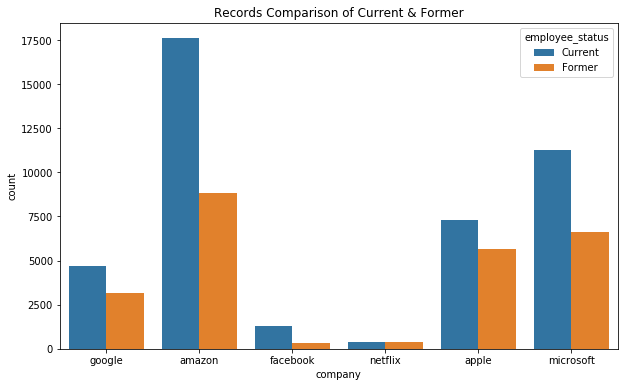

In [16]:
plt.figure(figsize =(10, 6))
sns.countplot(x='company', data=df, hue='employee_status')
plt.title('Records Comparison of Current & Former')
plt.show()

### 3. 基于评分的统计分析及可视化

#### 可视化对比各公司的总体评分

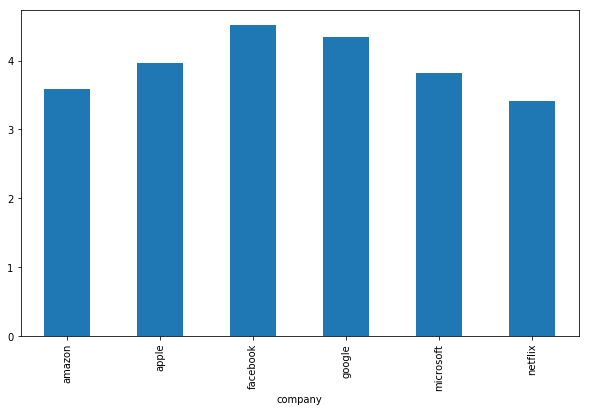

In [17]:
plt.figure(figsize =(10, 6))
df.groupby('company')['overall-ratings'].mean().plot(kind='bar')
plt.show()

#### 可视化对比各公司的各项评分

In [18]:
rating_cols = ['overall-ratings', 'work-balance-stars', 'culture-values-stars', 
                'carrer-opportunities-stars', 'comp-benefit-stars', 'senior-mangemnet-stars']

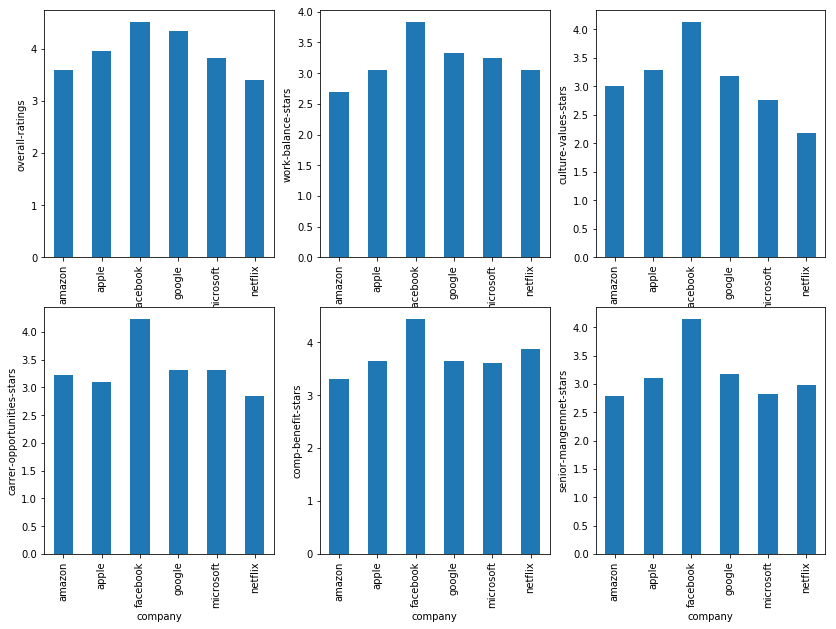

In [19]:
plt.figure(figsize =(14, 10))
i = 231
for rating_col in rating_cols:
    plt.subplot(i)
    df.groupby('company')[rating_col].mean().plot(kind='bar')
    plt.ylabel(rating_col)
    i += 1
plt.show()

#### 可视化对比各公司前员工和在职员工的总体评分

In [20]:
results = df.groupby(['company', 'employee_status'])['overall-ratings'].mean()
results

company    employee_status
amazon     Current            3.795775
           Former             3.171390
apple      Current            4.059349
           Former             3.828425
facebook   Current            4.667709
           Former             3.871383
google     Current            4.425732
           Former             4.210828
microsoft  Current            3.914430
           Former             3.650203
netflix    Current            3.925926
           Former             2.896296
Name: overall-ratings, dtype: float64

In [21]:
current_mean_ratings = results[:, 'Current']
current_mean_ratings

company
amazon       3.795775
apple        4.059349
facebook     4.667709
google       4.425732
microsoft    3.914430
netflix      3.925926
Name: overall-ratings, dtype: float64

In [22]:
former_mean_ratings = results[:, 'Former']
former_mean_ratings

company
amazon       3.171390
apple        3.828425
facebook     3.871383
google       4.210828
microsoft    3.650203
netflix      2.896296
Name: overall-ratings, dtype: float64

In [23]:
mean_ratings = pd.DataFrame()
mean_ratings['Current Mean Ratings'] = current_mean_ratings
mean_ratings['Former Mean Ratings'] = former_mean_ratings

mean_ratings

,Current Mean Ratings,Former Mean Ratings
company,,
amazon,3.795775,3.171390
apple,4.059349,3.828425
facebook,4.667709,3.871383
google,4.425732,4.210828
microsoft,3.914430,3.650203
netflix,3.925926,2.896296


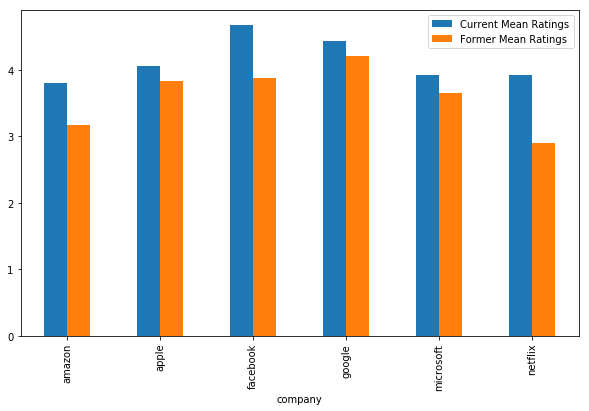

In [24]:
mean_ratings.plot(kind='bar', figsize=(10, 6))
plt.show()

### 4. 基于评论的文本分析及可视化

In [25]:
from wordcloud import WordCloud

#### 对单个公司的评论进行可视化分析

In [26]:
facebook_df = df.loc[df['company'] == 'facebook']
facebook_df.head()

,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link,employee_status
34249,facebook,"Menlo Park, CA","Dec 11, 2018",Current Employee - Product Operations,2nd Job out of college --> Great Experience,Context: I worked in operations - Very entrepr...,- Very entrepreneurial culture: There is no fo...,none,5,4.0,4.0,5.0,5.0,4.0,0,https://www.glassdoor.com/Reviews/Facebook-Rev...,Current
34250,facebook,"Menlo Park, CA","Feb 16, 2017",Current Employee - Anonymous Employee,"Fast paced company with high expectations, but...",=- incredible benefits - Excellent compensatio...,- If you don't learn to make the work life bal...,"Keep doing what you're doing, keep an eye on e...",5,5.0,5.0,5.0,5.0,5.0,294,https://www.glassdoor.com/Reviews/Facebook-Rev...,Current
34251,facebook,"Menlo Park, CA","Feb 16, 2016",Current Employee - Site Selection Program Manager,Pleasantly Surprised,I'm a 55 year old working in a company where t...,"Like any tech company, the work is big and com...",Keep doing what you're doing and fight hard to...,5,4.0,5.0,4.0,5.0,5.0,363,https://www.glassdoor.com/Reviews/Facebook-Rev...,Current
34252,facebook,"Menlo Park, CA","Dec 3, 2018",Current Employee - Anonymous Employee,Don't believe all of the negative press,Having worked at Facebook for a number of year...,"Particularly as of late, Facebook has been sub...",none,5,4.0,5.0,5.0,5.0,5.0,6,https://www.glassdoor.com/Reviews/Facebook-Rev...,Current
34253,facebook,"Seattle, WA","Dec 5, 2018",Current Employee - Staff Software Engineer,Continues to be an amazing place to be,Smart people who were chosen to be good to wor...,Took a year and a half to learn to play defens...,I'd love to see management be half as open wit...,5,5.0,5.0,5.0,4.0,5.0,4,https://www.glassdoor.com/Reviews/Facebook-Rev...,Current


In [27]:
all_review = ' '.join(str(review) for review in facebook_df['summary'])
all_review[:1000]

"2nd Job out of college --> Great Experience Fast paced company with high expectations, but incredibly fair. You won't a place that cares more about it's people. Pleasantly Surprised Don't believe all of the negative press Continues to be an amazing place to be AVOID FB, incompetent management, bias against women Recruiting Not for everyone, high stress, and company growing pains Loves its employees Great company Best place to work!! Contract converted to Full Time Employee A mission worth fighting for, but many issues at home Great company! What a wonderful place Great people, benefits, and career growth Thankful to work here Great place to work Fantastic Place to Work Feels like working on a political campaign Smart people, incompetent mgmt Great place to start a career Rush for growth at the tech debt Best Benefits The Best Best place I have worked at Senior Technical Program Manager I have been working at Facebook full-time (More than 3 year) Shockingly Transparent and Open Some ad

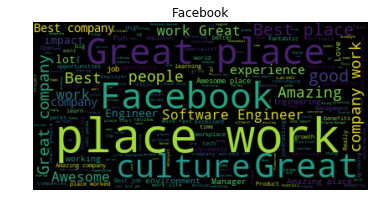

In [28]:
wordcloud = WordCloud().generate(all_review)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Facebook')
plt.show()

#### 对所有公司的评论进行可视化分析

In [29]:
companies = pd.unique(df['company'])
companies

array(['google', 'amazon', 'facebook', 'netflix', 'apple', 'microsoft'],
      dtype=object)

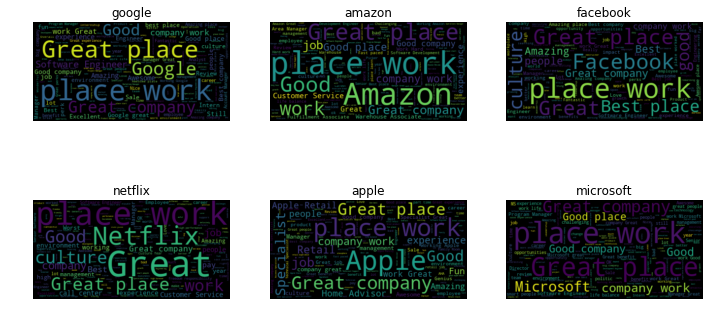

In [30]:
plt.figure(figsize =(12, 6))
i = 231
for company in companies:
    plt.subplot(i)
    company_df = df.loc[df['company'] == company]
    company_review = ' '.join(str(review) for review in company_df['summary'])
    wordcloud = WordCloud().generate(company_review)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(company)
    i += 1
plt.show()

## Summary

- 使用Pandas读取CSV数据集: pd.read_csv()
- 数据集基本信息查看: df.head(), df.describe(), df.info()
- Pandas的apply操作: df.apply()
- 数据类型转换: pd.to_numeric()
- 缺失值处理: df.fillna()
- 数据整合: 数据过滤，添加列
- 数据分组: df.groupby()
- 层级索引
- Pandas数据可视化: df.plot()
- Seaborn数据可视化: sns.countplot()
- 文本词云可视化: WordCloud().generate()